In [6]:
# Import setup and seaborn_helpers
from setup.setup import *
from seaborn_helpers import *

In [7]:
# Load cdl dataframe
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\03 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\setup\setup.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5683,70661,2024-05-19,Sunday,Shotzzy,OpTic Texas,4,Rio,Hardpoint,37,22,...,1,W,TX,OpTic,Toronto Ultra,TOR,118,368,132,0
5684,70661,2024-05-19,Sunday,CleanX,Toronto Ultra,4,Rio,Hardpoint,24,28,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0
5685,70661,2024-05-19,Sunday,Envoy,Toronto Ultra,4,Rio,Hardpoint,20,31,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0
5686,70661,2024-05-19,Sunday,Insight,Toronto Ultra,4,Rio,Hardpoint,12,27,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0


In [8]:
# Build series summaries
series_summaries = build_series_summaries(cdlDF)
series_summaries

,match_id,team,team_abbr,map_wins,map_losses,series_score_diff,match_date,opp
0,27193,Atlanta FaZe,ATL,3,2,1,2023-12-08,BOS
1,27193,Boston Breach,BOS,2,3,-1,2023-12-08,ATL
2,27194,Los Angeles Thieves,LAT,1,3,-2,2023-12-08,SEA
3,27194,Seattle Surge,SEA,3,1,2,2023-12-08,LAT
4,27195,New York Subliners,NYSL,3,2,1,2023-12-08,TX
...,...,...,...,...,...,...,...,...
355,70659,Toronto Ultra,TOR,3,2,1,2024-05-19,ATL
356,70660,Atlanta FaZe,ATL,2,3,-1,2024-05-19,TX
357,70660,OpTic Texas,TX,3,2,1,2024-05-19,ATL
358,70661,OpTic Texas,TX,4,0,4,2024-05-19,TOR


In [9]:
# Filter maps
cdlDF = filter_maps(cdlDF)
cdlDF

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4579,70661,2024-05-19,Sunday,Shotzzy,OpTic Texas,4,Rio,Hardpoint,37,22,...,1,W,TX,OpTic,Toronto Ultra,TOR,118,368,132,0
4580,70661,2024-05-19,Sunday,CleanX,Toronto Ultra,4,Rio,Hardpoint,24,28,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0
4581,70661,2024-05-19,Sunday,Envoy,Toronto Ultra,4,Rio,Hardpoint,20,31,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0
4582,70661,2024-05-19,Sunday,Insight,Toronto Ultra,4,Rio,Hardpoint,12,27,...,0,L,TOR,Ultra,OpTic Texas,TX,250,368,-132,0


In [10]:
# Build team summaries
team_summaries = build_team_summaries(cdlDF)
team_summaries

,team,gamemode,map_name,wins,losses,total,win_percentage
0,Atlanta FaZe,Hardpoint,6 Star,2,2,4,0.50
1,Atlanta FaZe,Hardpoint,Karachi,11,3,14,0.79
2,Atlanta FaZe,Hardpoint,Rio,7,0,7,1.00
3,Atlanta FaZe,Hardpoint,Sub Base,1,5,6,0.17
4,Atlanta FaZe,Hardpoint,Vista,6,0,6,1.00
...,...,...,...,...,...,...,...
187,Seattle Surge,Search & Destroy,Overall,15,12,27,0.56
188,Seattle Surge,Control,Overall,8,22,30,0.27
189,Toronto Ultra,Hardpoint,Overall,30,10,40,0.75
190,Toronto Ultra,Search & Destroy,Overall,18,14,32,0.56


In [11]:
rostersDF = build_rosters(cdlDF)
rostersDF

,player,team,team_abbr
0,aBeZy,Atlanta FaZe,ATL
1,Cellium,Atlanta FaZe,ATL
2,Drazah,Atlanta FaZe,ATL
3,Simp,Atlanta FaZe,ATL
4,Beans,Boston Breach,BOS
5,Pentagrxm,Boston Breach,BOS
6,Priestahh,Boston Breach,BOS
7,Snoopy,Boston Breach,BOS
8,Clayster,Carolina Royal Ravens,CAR
9,FeLo,Carolina Royal Ravens,CAR


In [12]:
# Global color variables
theme_color_light = "#2fa4e7"
theme_color_dark = "#1b6ead"
team_a_color = theme_color_light
team_b_color = theme_color_dark


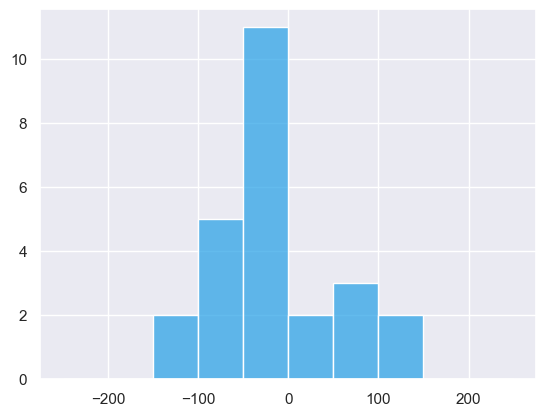

In [13]:
# Team Score Diffs: Hardpoint All
team_score_diffs(cdlDF, "Minnesota ROKKR", theme_color_light, "Hardpoint")

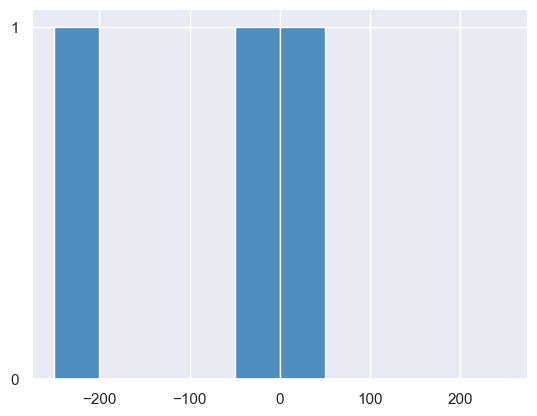

In [14]:
# Team Score Diffs: Hardpoint Single Map
team_score_diffs(cdlDF, "Las Vegas Legion", theme_color_dark, "Hardpoint", "6 Star")

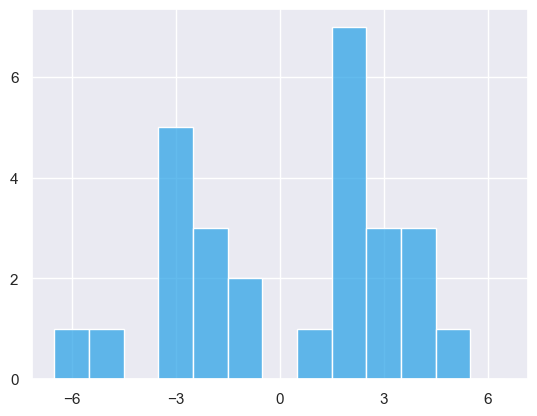

In [15]:
# Team Score Diffs: SnD All
team_score_diffs(cdlDF, "Seattle Surge", theme_color_light, "Search & Destroy")

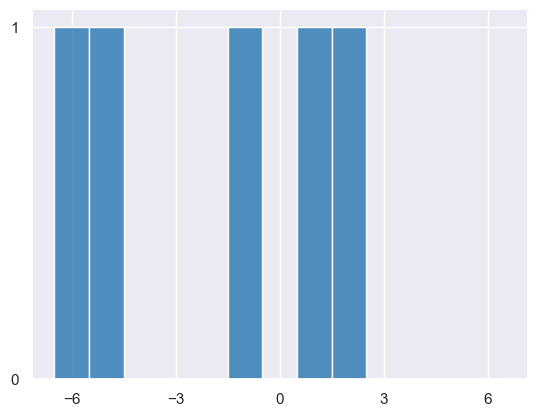

In [16]:
# Team Score Diffs: SnD Single Map
team_score_diffs(cdlDF, "Toronto Ultra", theme_color_dark, "Search & Destroy", "Rio")

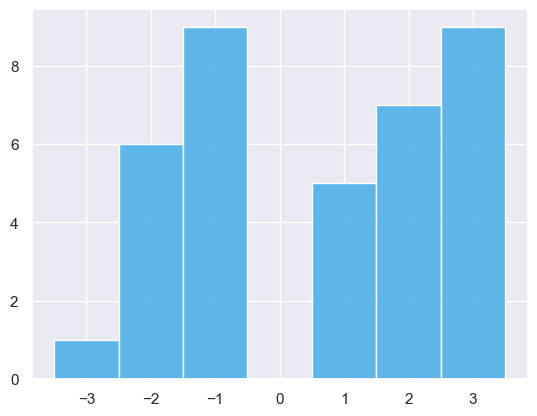

In [17]:
# Team Score Diffs: Control All
team_score_diffs(cdlDF, "OpTic Texas", theme_color_light, "Control")

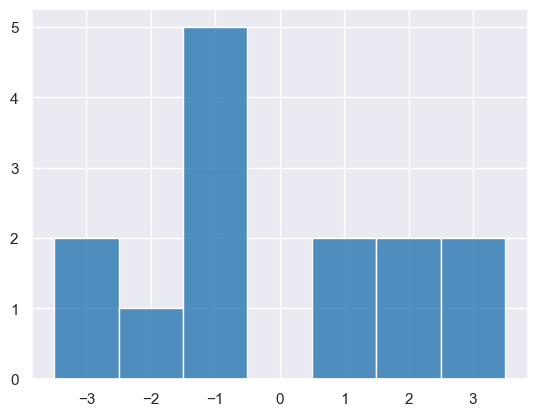

In [18]:
# Team Score Diffs: Control Single Map
team_score_diffs(cdlDF, "Carolina Royal Ravens", theme_color_dark, "Control", "Highrise")

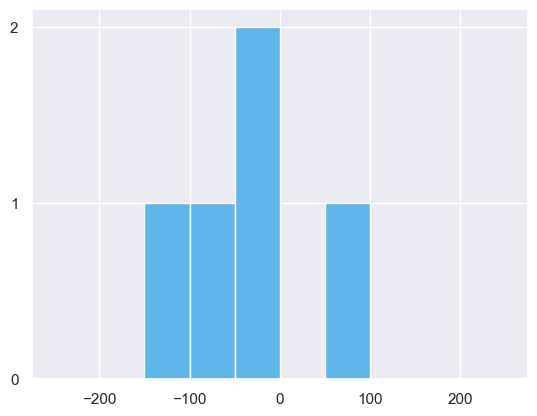

In [19]:
# Team Score Diffs: HP Single Map only Played Once
team_score_diffs(cdlDF, "New York Subliners", theme_color_light, "Hardpoint", "Vista")

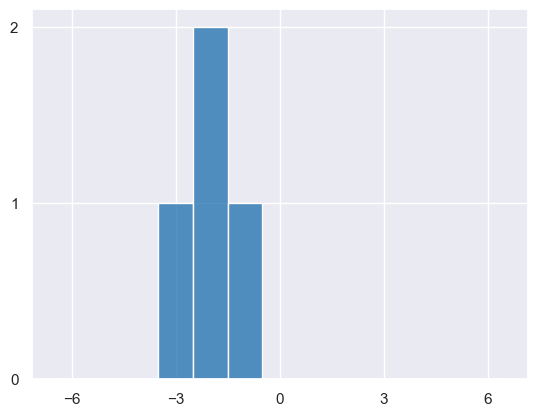

In [20]:
# Team Score Diffs: SnD Single Map only Played Once
team_score_diffs(cdlDF, "Boston Breach", theme_color_dark, "Search & Destroy", "6 Star")

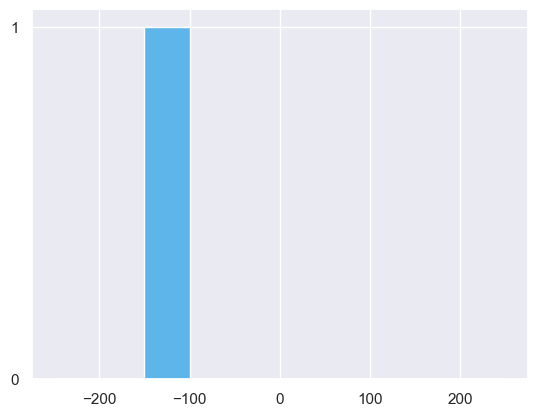

In [21]:
# Team Score Diffs: Team never played Map 
team_score_diffs(cdlDF, "Los Angeles Guerrillas", theme_color_light, "Hardpoint", "Vista")

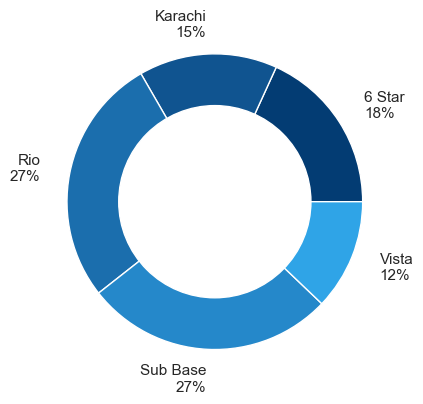

In [22]:
# Team % Maps Played: Hardpoint
team_percent_maps_played(team_summaries, "Miami Heretics", "Hardpoint")

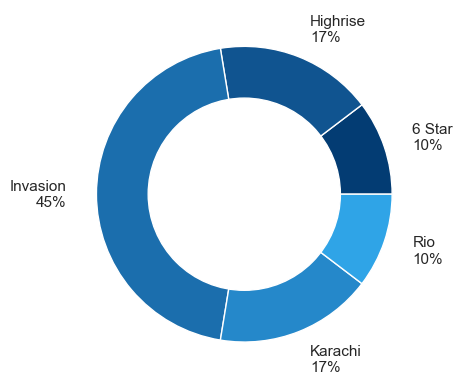

In [23]:
# Team % Maps Played: SnD
team_percent_maps_played(team_summaries, "Las Vegas Legion", "Search & Destroy")

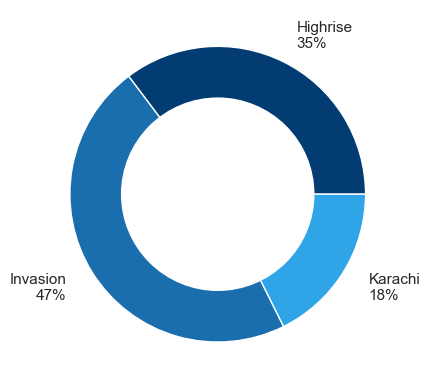

In [24]:
# Team % Maps Played: Control
team_percent_maps_played(team_summaries, "Atlanta FaZe", "Control")

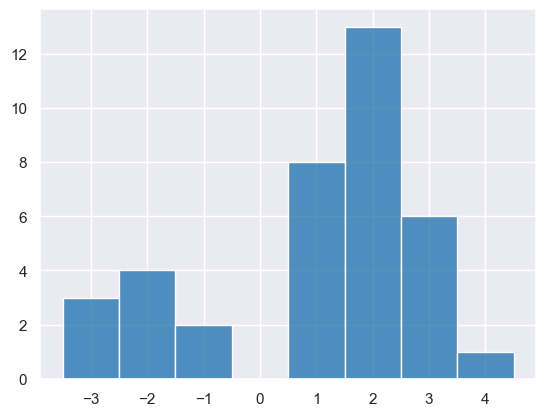

In [25]:
# Team Series Diffs: OpTic
team_series_diffs(series_summaries, "OpTic Texas", theme_color_dark)

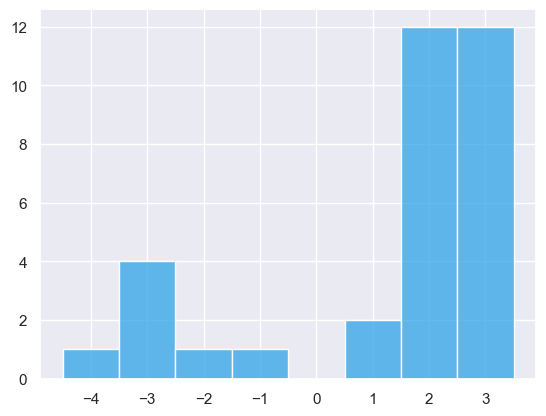

In [26]:
# Team Series Diffs: Ultra
team_series_diffs(series_summaries, "Toronto Ultra", theme_color_light)

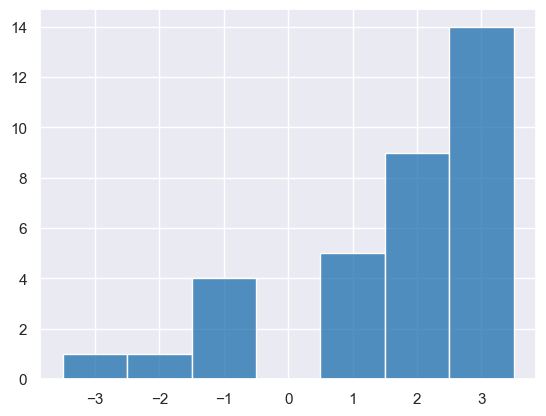

In [27]:
# Team Series Diffs: Ultra
team_series_diffs(series_summaries, "Atlanta FaZe", theme_color_dark)

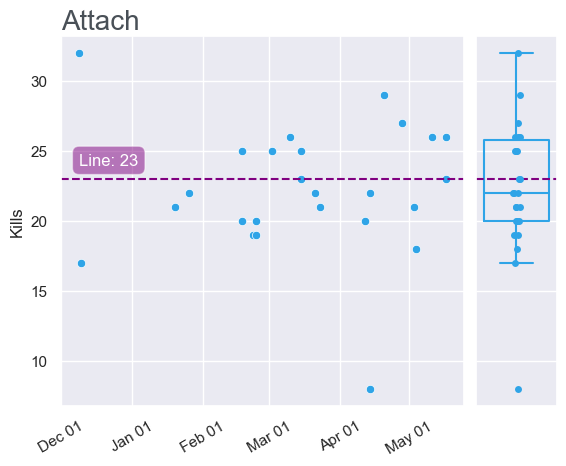

In [28]:
# Player Kills vs Time: Hardpoint All
player_kills_vs_time(cdlDF, "Attach", theme_color_light, "Hardpoint", 23)

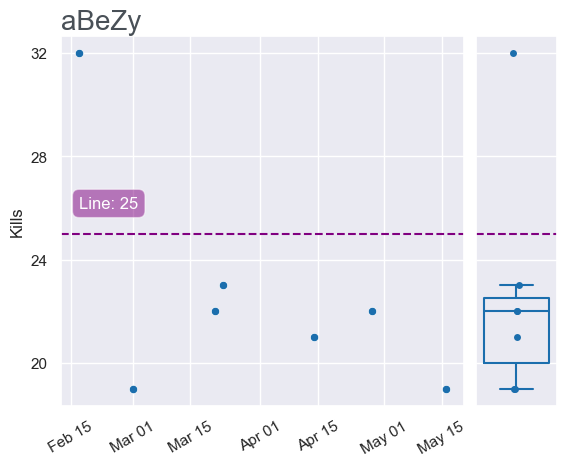

In [29]:
# Player Kills vs Time: Hardpoint Single Map
player_kills_vs_time(cdlDF, "aBeZy", theme_color_dark, "Hardpoint", 25, "Rio")

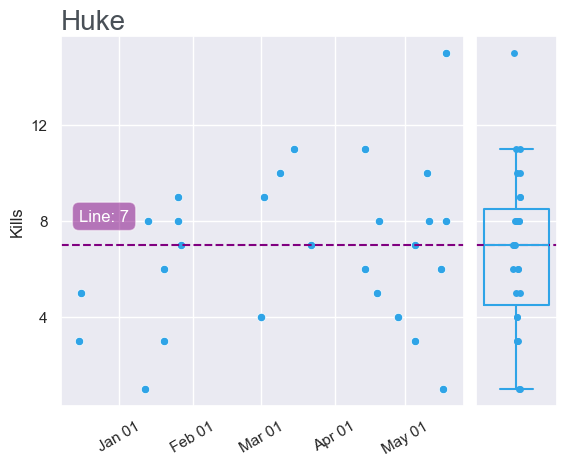

In [30]:
# Player Kills vs Time: SnD All
player_kills_vs_time(cdlDF, "Huke", theme_color_light, "Search & Destroy", 7)

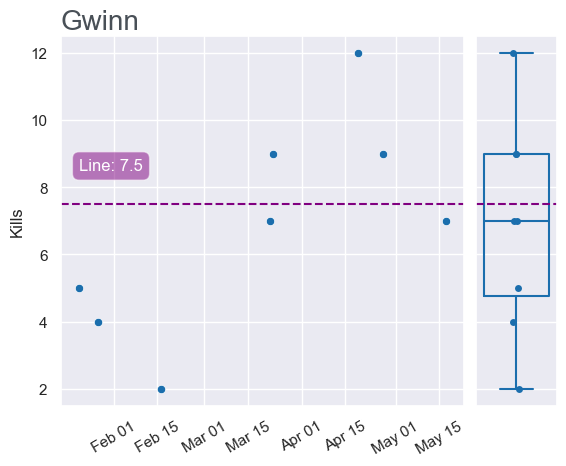

In [31]:
# Player Kills vs Time: SnD Single Map
player_kills_vs_time(cdlDF, "Gwinn", theme_color_dark, "Search & Destroy", 7.5, "Karachi")

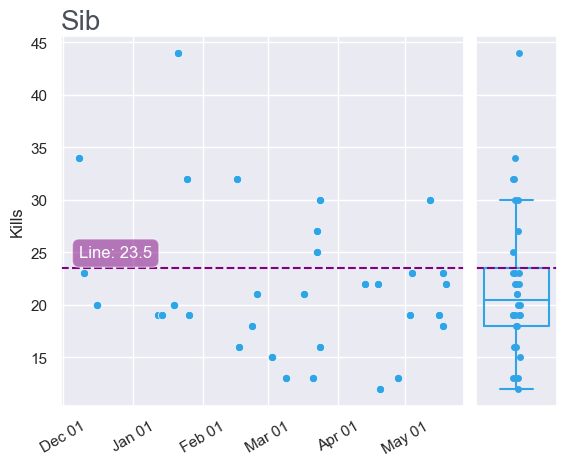

In [32]:
# Player Kills vs Time: Control All
player_kills_vs_time(cdlDF, "Sib", theme_color_light, "Control", 23.5)

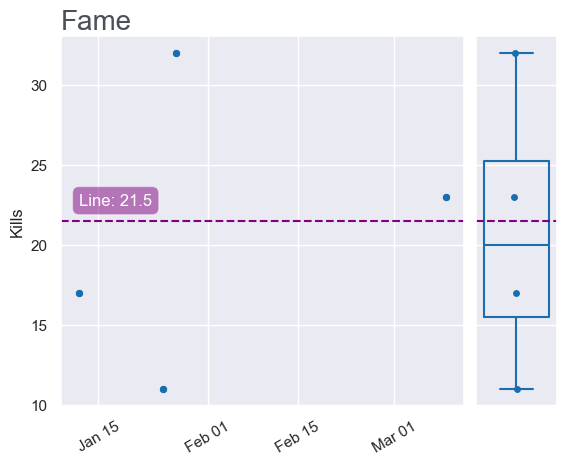

In [33]:
# Player Kills vs Time: Control Single Map
player_kills_vs_time(cdlDF, "Fame", theme_color_dark, "Control", 21.5, "Invasion")

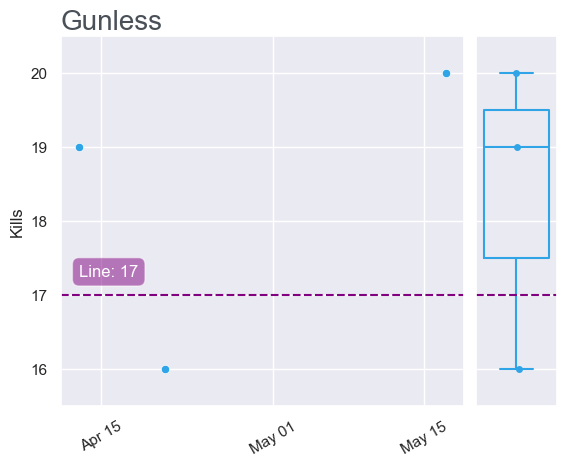

In [34]:
# Player Kills vs Time: Hardpoint Single Map only Played Once
player_kills_vs_time(cdlDF, "Gunless", theme_color_light, "Hardpoint", 17, "Karachi")

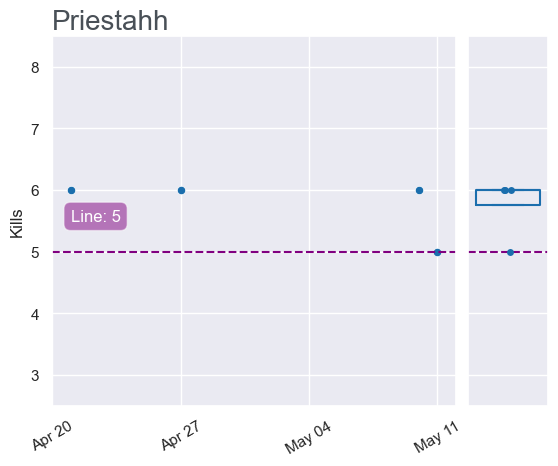

In [35]:
# Player Kills vs Time: SnD Single Map only Played Once
player_kills_vs_time(cdlDF, "Priestahh", theme_color_dark, "Search & Destroy", 5, "6 Star")

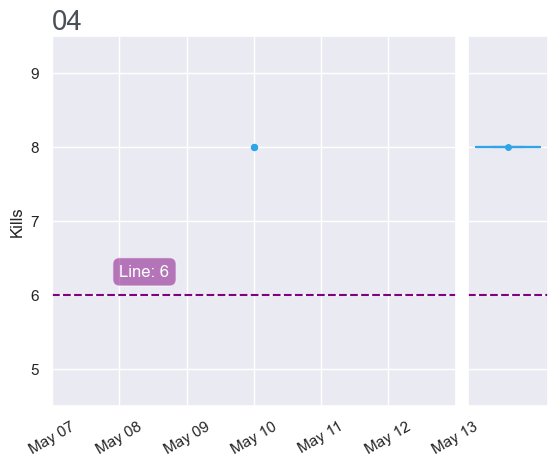

In [36]:
# Player Kills vs Time: Player never played Map
player_kills_vs_time(cdlDF, "04", theme_color_light, "Search & Destroy", 6, "Karachi")

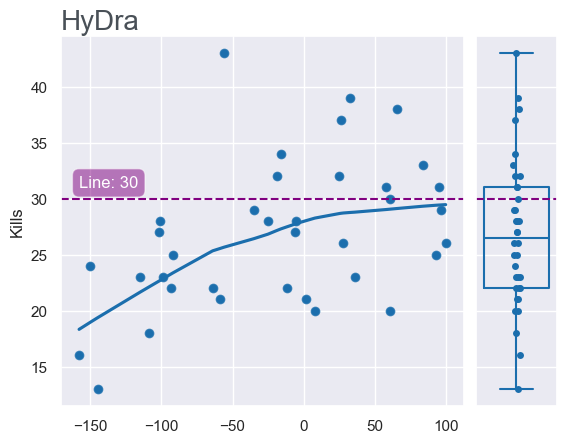

In [37]:
# Player Kills vs Score Diff: Hardpoint All
player_kills_vs_score_diff(cdlDF, "HyDra", theme_color_dark, "Hardpoint", 30)

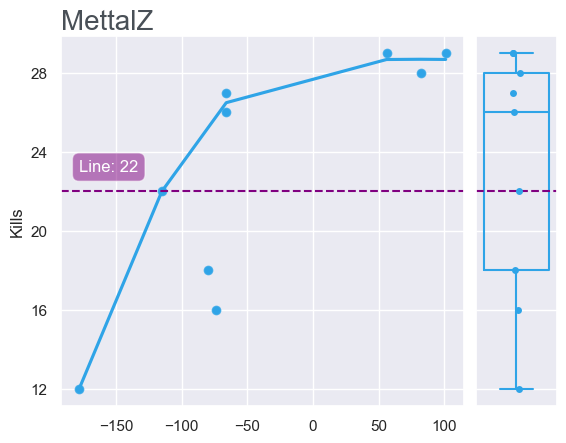

In [38]:
# Player Kills vs Score Diff: Hardpoint Single Map
player_kills_vs_score_diff(cdlDF, "MettalZ", theme_color_light, "Hardpoint", 22, "Rio")

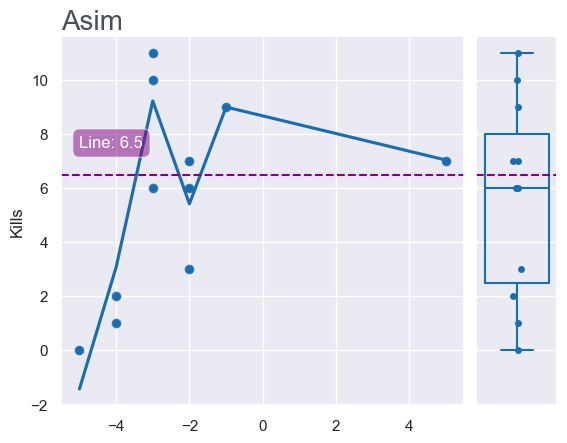

In [39]:
# Player Kills vs Score Diff: SnD All
player_kills_vs_score_diff(cdlDF, "Asim", theme_color_dark, "Search & Destroy", 6.5)

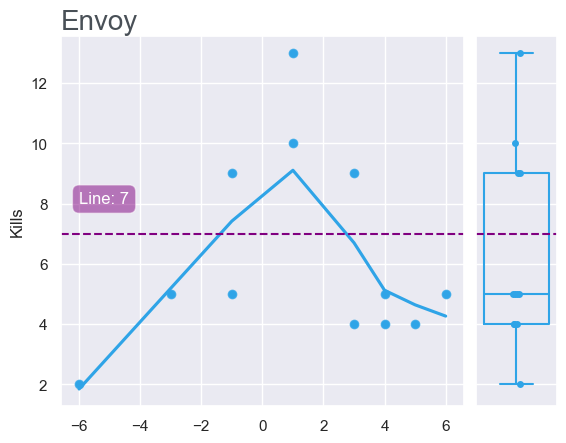

In [40]:
# Player Kills vs Score Diff: SnD Single Map
player_kills_vs_score_diff(cdlDF, "Envoy", theme_color_light, "Search & Destroy", 7, "Karachi")

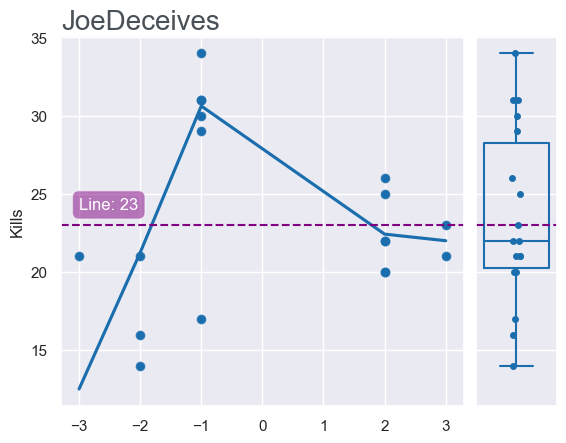

In [41]:
# Player Kills vs Score Diff: Control All
player_kills_vs_score_diff(cdlDF, "JoeDeceives", theme_color_dark, "Control", 23)

c:\Users\David Harler Jr\anaconda3\envs\PythonData\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


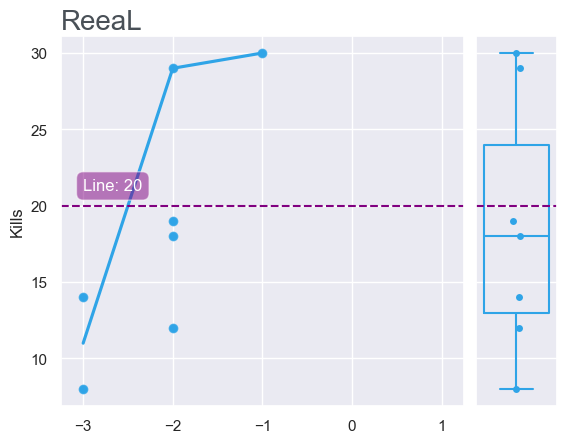

In [42]:
# Player Kills vs Score Diff: Control Single Map
player_kills_vs_score_diff(cdlDF, "ReeaL", theme_color_light, "Control", 20, "Highrise")

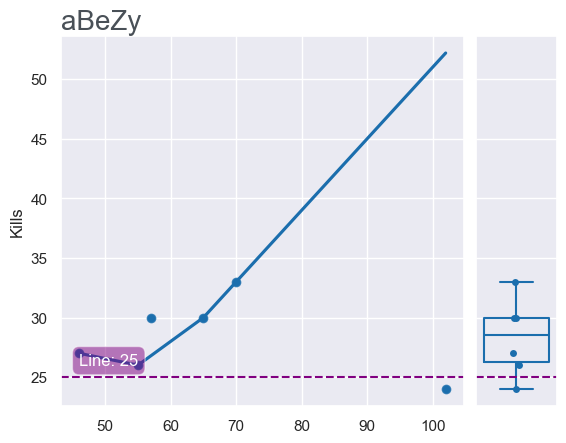

In [43]:
# Player Kills vs Score Diff: Hardpoint Single Map only Played Once
player_kills_vs_score_diff(cdlDF, "aBeZy", theme_color_dark, "Hardpoint", 25, "Vista")

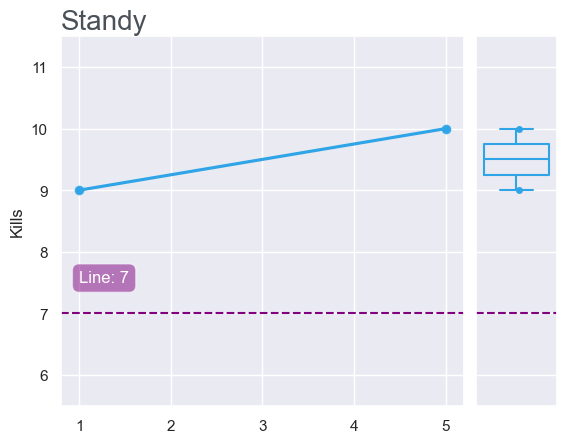

In [44]:
# Player Kills vs Score Diff: SnD Single Map only Played Once
player_kills_vs_score_diff(cdlDF, "Standy", theme_color_light, "Search & Destroy", 7, "6 Star")

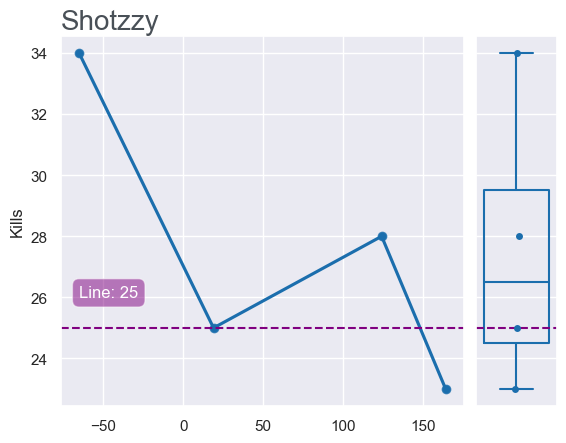

In [45]:
# Player Kills vs Score Diff: Player never played Map
player_kills_vs_score_diff(cdlDF, "Shotzzy", theme_color_dark, "Hardpoint", 25, "Vista")

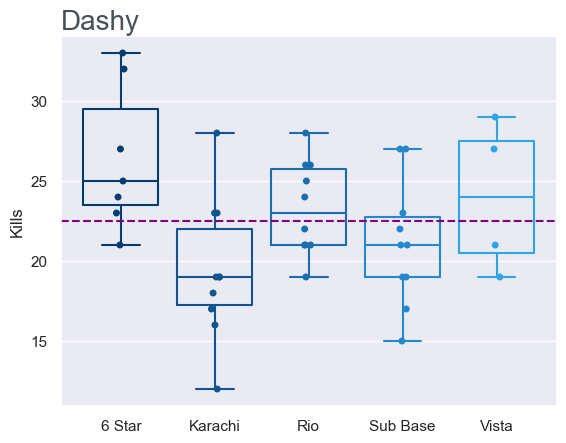

In [46]:
# Boxplots of Player Kills by Map
player_kills_by_map(cdlDF, "Dashy", "Hardpoint", 22.5)

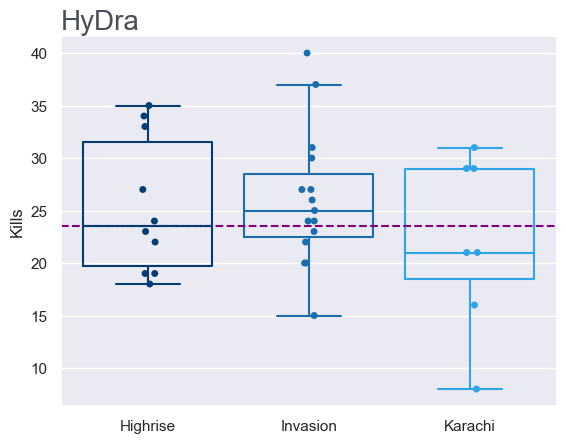

In [47]:
# Boxplots of Player Kills by Map
player_kills_by_map(cdlDF, "HyDra", "Control", 23.5)

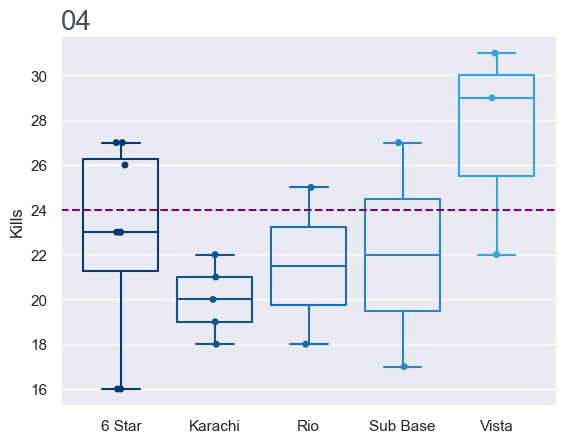

In [48]:
# Boxplots of Player Kills by Map
player_kills_by_map(cdlDF, "04", "Hardpoint", 24)

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\03 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\seaborn_helpers.py:532: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.boxplot(queried_df, x = "map_name", y =  "kills",
c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\03 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\seaborn_helpers.py:535: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.stripplot(queried_df, x = "map_name", y =  "kills",


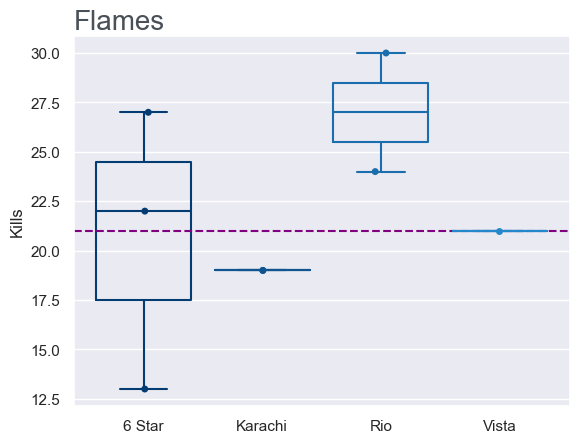

In [49]:
# Boxplots of Player Kills by Map
player_kills_by_map(cdlDF, "Flames", "Hardpoint", 21)

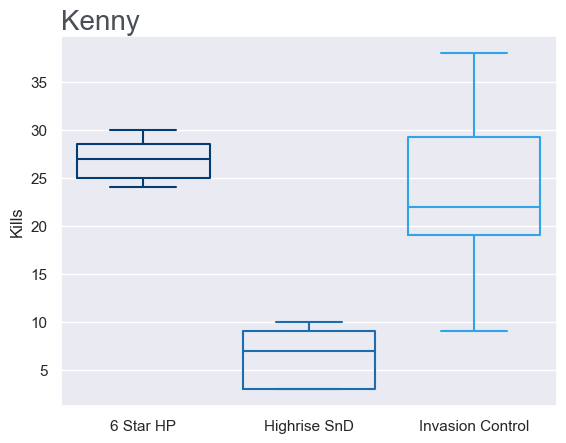

In [50]:
# Boxplots of Player Kills for Selected Mapset
player_kills_by_mapset(cdlDF, "Kenny", "6 Star", "Highrise", "Invasion")

## Exploring Ridgeline Plots with Seaborn

In [51]:
# Team colors
team_colors = [
  "#e43d30", "#02ff5b", "#0083c1", "#60269e", "#ff0000", "#ee7623", 
  "#216d6b", "#351f65", "#fff000", "#00ffcc", "#780df2", "#92c951"
]

sns.color_palette(team_colors)

[(0.8941176470588236, 0.23921568627450981, 0.18823529411764706),
 (0.00784313725490196, 1.0, 0.3568627450980392),
 (0.0, 0.5137254901960784, 0.7568627450980392),
 (0.3764705882352941, 0.14901960784313725, 0.6196078431372549),
 (1.0, 0.0, 0.0),
 (0.9333333333333333, 0.4627450980392157, 0.13725490196078433),
 (0.12941176470588237, 0.42745098039215684, 0.4196078431372549),
 (0.20784313725490197, 0.12156862745098039, 0.396078431372549),
 (1.0, 0.9411764705882353, 0.0),
 (0.0, 1.0, 0.8),
 (0.47058823529411764, 0.050980392156862744, 0.9490196078431372),
 (0.5725490196078431, 0.788235294117647, 0.3176470588235294)]

In [52]:
# Adjusted Team colors
team_colors_2 = [
  "#e43d30", "#02ff5b", "#0083c1", "#60269e", "#ff0000", "#ee7623", 
  "#216d6b", "#351f65", "#171C38", "#00ffcc", "#780df2", "#000000"
]

sns.color_palette(team_colors_2)

[(0.8941176470588236, 0.23921568627450981, 0.18823529411764706),
 (0.00784313725490196, 1.0, 0.3568627450980392),
 (0.0, 0.5137254901960784, 0.7568627450980392),
 (0.3764705882352941, 0.14901960784313725, 0.6196078431372549),
 (1.0, 0.0, 0.0),
 (0.9333333333333333, 0.4627450980392157, 0.13725490196078433),
 (0.12941176470588237, 0.42745098039215684, 0.4196078431372549),
 (0.20784313725490197, 0.12156862745098039, 0.396078431372549),
 (0.09019607843137255, 0.10980392156862745, 0.2196078431372549),
 (0.0, 1.0, 0.8),
 (0.47058823529411764, 0.050980392156862744, 0.9490196078431372),
 (0.0, 0.0, 0.0)]

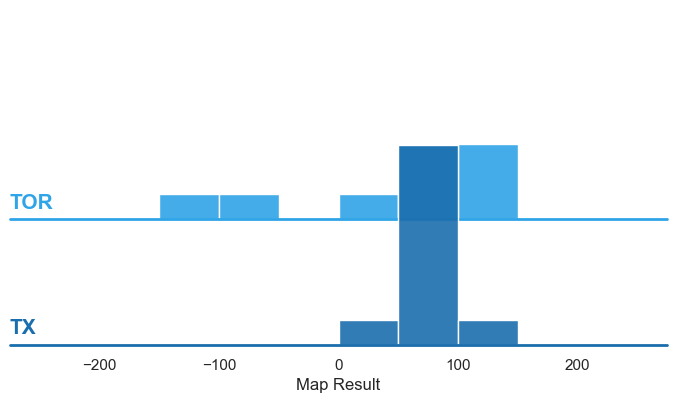

In [137]:
score_diffs_ridge(cdlDF, "TOR", "TX", theme_color_light, theme_color_dark, "Hardpoint", "Sub Base")

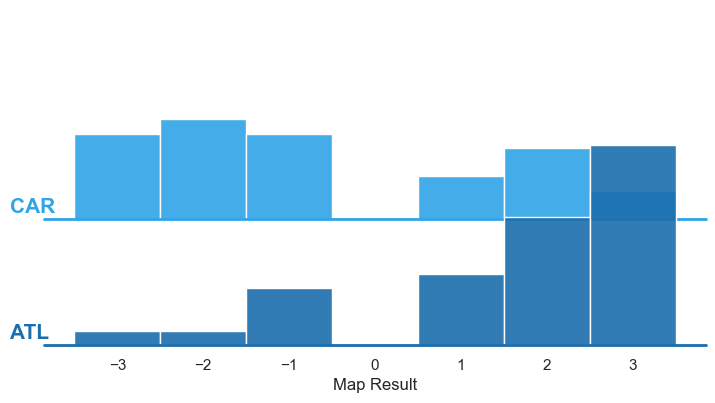

In [163]:
series_diff_ridge(series_summaries, "CAR", "ATL", theme_color_light, theme_color_dark)